# Estadistica Aplicada
José Alfonso González Acosta - 1989939 <br>
3 de mayo de 2023

### Pronostico de Series de Tiempo (ARIMA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima.model import ARIMA

In [3]:
igae = pd.read_excel('IGAE.xlsx')

Cuando trabjemos con series de tiempo siempre hay que definir/ especificar la variable de tiempo y hay que convertirla en el Index.

In [4]:
igae.head(2)

,Periodos,IGAE
0,2000/01,79.325572
1,2000/02,78.799329


In [5]:
igae['Periodos'] = pd.to_datetime(igae['Periodos'],format='%Y/%m')

In [6]:
igae = igae.set_index("Periodos")

In [7]:
igae = igae.asfreq("MS")

Una vez definida la varieble de tiempo, convertida en index y asignada a la frecuencia podemos usar análisis de series de tiempo en Python.

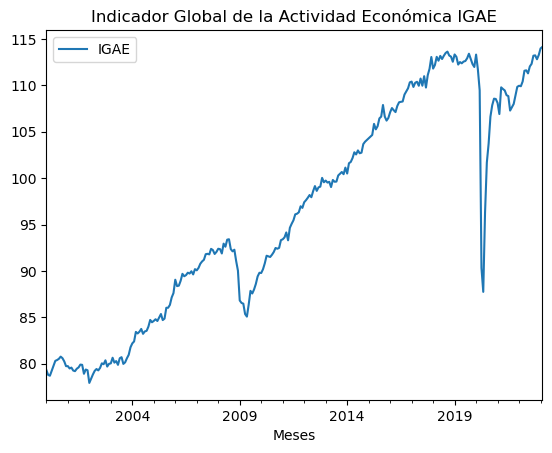

In [8]:
igae.plot()
plt.title("Indicador Global de la Actividad Económica IGAE")
plt.xlabel('Meses')
plt.show()

El IGAE se parece a una caminata aleatoria con deriva (es un proceso no estacionario), tiene tendencia positiva (va creciendo en el tiempo), también observamos los ciclos de la serie.

#### 1. Probar Estacionaridad

In [10]:
# Prueba de Raiz Unitaria
# Prueba de Dickey-fuller Aumentada
# Ho: Serie NO Estacionaria

ADF_test1 = adfuller(igae['IGAE'])
alpha = 0.05
if ADF_test1[1]<alpha:
    print("Rechazamos H0. Por lo tanto la Serie es Estacionaria.")
else:
    print("No Rechazamos H0. Por lo tanto la Serie es NO Estacionaria.")

No Rechazamos H0. Por lo tanto la Serie es NO Estacionaria.


Para convertir una serie estacionaria tenemos que aplicar primeras diferencias:

$\Delta Y_t = Y_t - Y_{t-1}$

In [11]:
igae['igae_diferenciado'] = igae['IGAE'].diff()

In [12]:
igae.head(5)

,IGAE,igae_diferenciado
Periodos,,
2000-01-01,79.325572,NaN
2000-02-01,78.799329,-0.526243
2000-03-01,78.714380,-0.084950
2000-04-01,79.247601,0.533221
2000-05-01,79.795178,0.547577


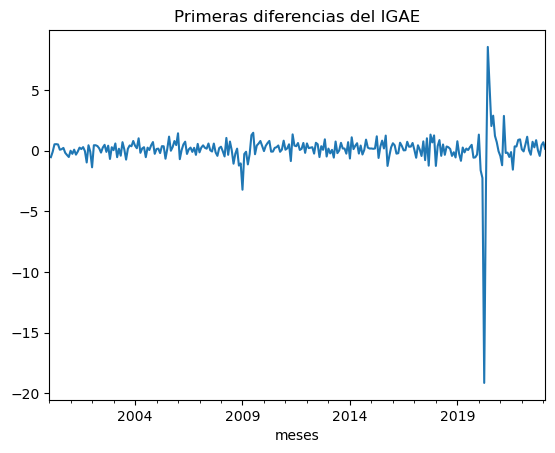

In [13]:
igae['igae_diferenciado'].plot()
plt.xlabel("meses")
plt.title("Primeras diferencias del IGAE")
plt.show()

In [15]:
ADF_test2 = adfuller(igae['igae_diferenciado'].dropna())

if ADF_test2[1] < alpha:
    print("Rechazamos H0. Por lo tanto la Serie es Estacionaria.")
else:
    print("No Rechazamos H0. Por lo tanto la Serie es NO Estacionaria.")

Rechazamos H0. Por lo tanto la Serie es Estacionaria.


Si la serie es estacionaria, lo siguiente es identificar que tipo de proceso estacionario es, para eso nos auxiliamos de ACF Y PACF.

C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


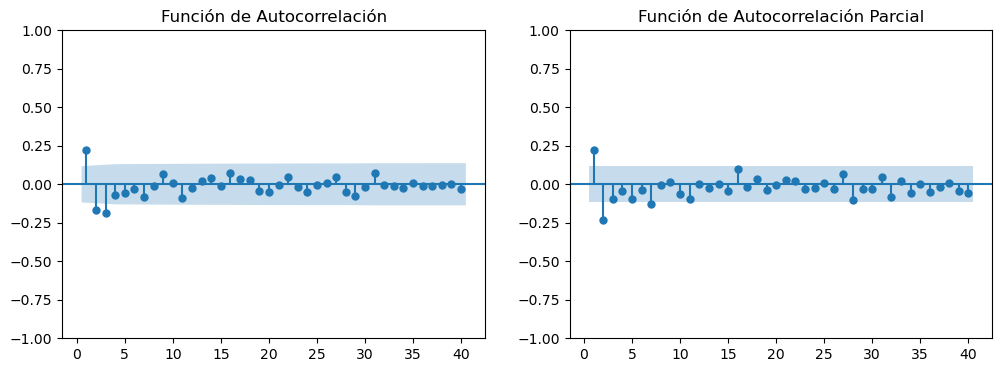

In [16]:
ig, ax = plt.subplots(1,2, figsize=(12,4))

plot_acf(igae['igae_diferenciado'].dropna(), zero=False, lags=40, ax=ax[0],title="Función de Autocorrelación")
ax[0].set_ylim(-1,1)
plot_pacf(igae['igae_diferenciado'].dropna(), zero=False, lags=40, ax=ax[1], title="Función de Autocorrelación Parcial")
ax[1].set_ylim(-1,1)
plt.show()

**ACF** te da el grado de MA(q) <br>
**PACF** te da el grado del AR(p)

Vamos a suponer que estamos ante un AR(2)

ARIMA (p,I,q) <br>
**p** es el orden del AR <br>
**q** es el orden MA <br>
**I** es el orden de integración de la serie de tiempo (cuantas veces se diferenció la serie para hacerla estacionaria)

In [ ]:
ARIMA (p, I=0, q) = ARMA(p,q) <br>
ARMA (p=0, 1) = MA (1) <br>
ARMA (p, q=0) = AR (p)

In [20]:
modelo = ARIMA(igae['igae_diferenciado'].dropna(), order=(2,0,0))
resultado = modelo.fit()
print(resultado.summary())

                               SARIMAX Results                                
Dep. Variable:      igae_diferenciado   No. Observations:                  277
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -484.350
Date:                Wed, 03 May 2023   AIC                            976.699
Time:                        15:58:21   BIC                            991.195
Sample:                    02-01-2000   HQIC                           982.516
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1253      0.156      0.802      0.423      -0.181       0.432
ar.L1          0.2741      0.042      6.485      0.000       0.191       0.357
ar.L2         -0.2301      0.023    -10.171      0.0

El modelo estimado es:
    
$Y_t = 0.27 Y_{t-1} - 0.23 Y_{t-2} + \varepsilon_t $

El AIC (Criterio de Akaike), el BIC (Criterio Bayesiano de Información) y el HQIC, son medidas de bondad de ajuste del modelo. Se utilizan para comparar modelos similares (del mismo tipo con la misma variable dependiente) y la regla es que el mejor modelo es el que tiene el menor valor de el estadístico elegido.

In [23]:
modelo2 = ARIMA(igae['igae_diferenciado'].dropna(), order=(3,0,0))
resultado2 = modelo2.fit()
print(resultado2.summary())

                               SARIMAX Results                                
Dep. Variable:      igae_diferenciado   No. Observations:                  277
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -483.037
Date:                Wed, 03 May 2023   AIC                            976.075
Time:                        16:15:03   BIC                            994.195
Sample:                    02-01-2000   HQIC                           983.345
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1252      0.149      0.842      0.400      -0.166       0.416
ar.L1          0.2516      0.060      4.185      0.000       0.134       0.369
ar.L2         -0.2034      0.026     -7.970      0.0

In [25]:
# vamos a estimar varios modelos y que se guarde el AIC BIC
ic = {}
for ar in range(7):
    for ma in range(7):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(igae['igae_diferenciado'].dropna(), order=(ar, 1, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

 

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])

AR: 0, MA: 0
AR: 0, MA: 1
AR: 0, MA: 2
AR: 0, MA: 3
AR: 0, MA: 4


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 5


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 0, MA: 6


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 0
AR: 1, MA: 1
AR: 1, MA: 2


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 3
AR: 1, MA: 4


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 5


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 1, MA: 6


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 2, MA: 0
AR: 2, MA: 1
AR: 2, MA: 2
AR: 2, MA: 3
AR: 2, MA: 4


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 5


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 2, MA: 6


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2
AR: 3, MA: 3


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 4


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 5


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 3, MA: 6


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 4, MA: 0
AR: 4, MA: 1
AR: 4, MA: 2
AR: 4, MA: 3


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 4


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 5


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 4, MA: 6


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 0
AR: 5, MA: 1
AR: 5, MA: 2
AR: 5, MA: 3


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 5, MA: 4


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 5


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 5, MA: 6


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AR: 6, MA: 0
AR: 6, MA: 1
AR: 6, MA: 2


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 3
AR: 6, MA: 4


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 5


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


AR: 6, MA: 6


C:\Users\ponch\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
ic.sort_values('AIC', ascending = True) [0:5]

AIC          BIC
AR MA                         
2  2   975.786483   993.888487
1  4   975.908435   997.630841
0  4   976.999112   995.101117
   6   977.307132  1002.649938
   5   977.683323   999.405728

Según el criterio de Akaike el IGAE diferenciado es un ARMA (2,2)

In [27]:
ic.sort_values('BIC', ascending = True) [0:5]

AIC         BIC
AR MA                        
2  2   975.786483  993.888487
   1   979.727897  994.209501
0  4   976.999112  995.101117
   2   985.963746  996.824949
3  1   979.293804  997.395808

Según el criterio de Bayesiano el IGAE diferenciado es un ARMA (2,2)

In [28]:
#Para el IGAE vamos a estimar un ARIMA (2,1,2)
modelo3= ARIMA (igae['IGAE'], order=(2,1,2))
resultado3 = modelo3.fit()
print(resultado3.summary())

                               SARIMAX Results                                
Dep. Variable:                   IGAE   No. Observations:                  278
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -482.713
Date:                Wed, 03 May 2023   AIC                            975.425
Time:                        16:19:40   BIC                            993.545
Sample:                    01-01-2000   HQIC                           982.696
                         - 02-01-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8014      0.230      3.489      0.000       0.351       1.252
ar.L2         -0.2151      0.236     -0.912      0.362      -0.678       0.247
ma.L1         -0.5587      0.230     -2.425      0.0

<AxesSubplot:xlabel='Periodos'>

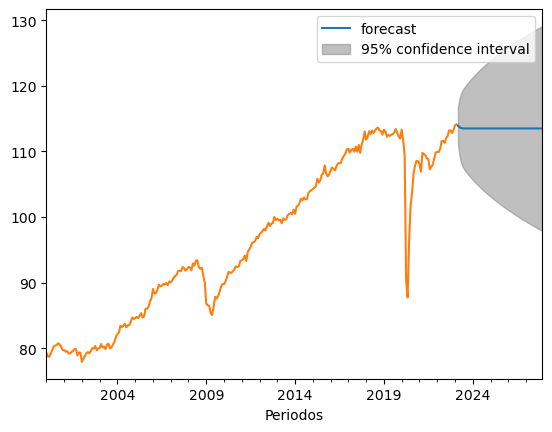

In [32]:
from statsmodels.graphics.tsaplots import plot_predict

plot_predict(resultado3, start='2023-03-01', end='2027-12-01')
igae['IGAE'].plot()

In [34]:
resultado3.predict('2023-03-01','2024-10-01')

2023-03-01    113.940583
2023-04-01    113.718561
2023-05-01    113.584648
2023-06-01    113.525094
2023-07-01    113.506177
2023-08-01    113.503828
2023-09-01    113.506016
2023-10-01    113.508275
2023-11-01    113.509614
2023-12-01    113.510202
2024-01-01    113.510385
2024-02-01    113.510405
2024-03-01    113.510381
2024-04-01    113.510358
2024-05-01    113.510345
2024-06-01    113.510339
2024-07-01    113.510337
2024-08-01    113.510337
2024-09-01    113.510337
2024-10-01    113.510338
Freq: MS, Name: predicted_mean, dtype: float64